<h1 style="color: navy bleu;text-align:center"> Rendu du Projet 2 : Modélisation avec les courbes de Bézier

<h3 style="color: navy bleu"> Saïda Guezoui, licence mathématiques</h3>
<h3 style="color: navy bleu"> Julien Antigny, licence maths info </h3>

# Plan :
1. Introduction 
2. Courbes de Bézier:<br>A.Définition et interprétation géométrique<br>B.Propriétés des courbes de Bézier<br>C.Théorème de Bernstein<br>D.Approximation de Bernstein et la vitesse de convergence<br>E.Interprétation géométriques des courbes de Bernstein<br>
3. Applications à la construction automobiles et extension de la méthode :<br>A.Un exemple de voiture<br>  B. Les courbes de Bézier cubiques <br>  C. Quelques dessins <br>
4.  Théorème de Bernstein pour des fonctions seulement continues<br>
5. Conclusion

# 1. Introduction:
Un écran d'ordinateur est une grille de points appelé pixels qui peuvent etre allumés ou éteints pour dessiner des images ou des textes. C'est pour cela qu'en 1980 si on zoom un texte ou une image affichée à l'écran on distingue une évolution par rapport à actuellement. 
<p><img src="zoom.JPG", width=200, height=120></p>

Cette évolution est due aux courbes de Bezier qui servent à représenter facilement avec un logiciel de conception assistée par ordinateur (CAO) des formes complexes (aile d'avion, pièce de voiture, fontes de caractères,…) en ne rentrant qu'un nombre fini de contraintes. En termes plus mathématiques, on souhaite construire des courbes lisses à partir d'un nombre fini de points de contrôles. 


# 2.Courbes de Bézier: 
## A. Définition et interprétation géométrique: 
### a/. Définition: 
Les courbes de Bézier représentent géométriquement des polynomes de Bernstein. Elles sont de degré n$ \geqslant 1$.

La courbe de Bézier est associée aux n+1 points de controles $ c_0,...,c_n \in \mathbb{R}^{2}$ et la courbe paramétrée 
$ \gamma_c^{n}(t): [0,1] \in \mathbb{R}^{2}$ est donnée par la formule:  
$$ \gamma_c^{n}(t) = \sum \limits_{\underset{}{k=0}}^n c_k B_k^n(t)     \quad où  \quad B_{k}^{n}(t) = \binom{n}{k}t^{k}(1-t)^{n-k}$$</i>

### b/. Définition de l'algorithme permettant la construction de $ \gamma_{c}^{n}(t)$:

Il existe plusieurs méthodes pour construire la courbe de $\gamma_{c}^{n}(t)$.
En effet, la méthode du calcul matriciel permet de faire une multiplication entre la matrice des points de contrôle et la matrice des polynômes de Bernstein.

Pour mieux illustrer ce raisonnement, on considère l'exemple de la matrice suivante: 
$c=\left(
\begin{array}{ccccccc}
1&2&5&8&13&15&12\\
1&4&7&8&6&5&1.5
\end{array}
\right)$

Soit l'ensemble  $T=\lbrace t_{1}, t_{2}, ..., t_{m}\rbrace$ tel que  $0 = t_{1} \lt t_{2} \lt ... \lt t_{m} = 1 $.

Plus m est grand plus notre courbe sera lisse.

A partir de là, on peut définir l'ensemble des polynômes de Bernstein :
$B^{n}=\left(
\begin{array}{cccc}
B_{0}^{n}(t_{1})&B_{0}^{n}(t_{2})&...&B_{0}^{n}(t_{m})\\
B_{1}^{n}(t_{1})&B_{1}^{n}(t_{2})&...&B_{1}^{n}(t_{m})\\
B_{2}^{n}(t_{1})&B_{2}^{n}(t_{2})&...&B_{2}^{n}(t_{m})\\
B_{3}^{n}(t_{1})&B_{3}^{n}(t_{2})&...&B_{3}^{n}(t_{m})\\
B_{4}^{n}(t_{1})&B_{4}^{n}(t_{2})&...&B_{4}^{n}(t_{m})\\
B_{5}^{n}(t_{1})&B_{5}^{n}(t_{2})&...&B_{5}^{n}(t_{m})\\
B_{6}^{n}(t_{1})&B_{6}^{n}(t_{2})&...&B_{6}^{n}(t_{m})
\end{array}\right)$

Ainsi, le calcul de $\gamma_{c}^{n}(t)$ se simplifie en
$$\gamma_{c}^{n}(t) = c \cdot B^{n}$$<br>
Ce qui nous donne une matrice de taille 2 x 7 et plus généralement de taille 2 x m.

### c/. Représentation graphique : 
Tout au long de notre étude, nous allons utiliser une bibliothéque, un module et une fonction :

. La bibliothèque <i>NumPy</i> permet d’effectuer des calculs scientifiques.

. Le module Pyplot de la bibliothèque <i>matplotlib</i> sert à créer des graphes.

. La fonction <i>binom</i> calcule les coefficients binomiaux.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import binom

#### 1. Initiation : 

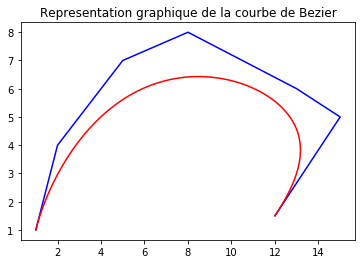

In [2]:
"""Initialisation"""
#Nombre de points de contrôle.
N= 7

#Matrice des points de contrôle de taille 2*N.
c= np.array([[1,2,5,8,13,15,12],[1,4,7,8,6,5,1.5]])

#Vecteur T selon un pas défini.
pas= 0.01
t= np.arange(0, 1+pas, pas) #Pour inclure le point 1.


"""Calcul des polynômes de Bernstein"""
#Création de la matrice des polynômes de Bernstein selon N et la taille de t.
matriceBernstein = np.zeros((N, t.size), float)

#Calcul des polynômes.
for i in range(N):
        matriceBernstein[i,:]= binom(N-1,i)*(t**i)*((1-t)**(N-1-i))
        
        
"""Calcul des points de la courbe"""
#Multiplication de la matrice c et matriceBernstein.
matriceBezier= np.dot(c, matriceBernstein)


"""Graphe de la courbe"""
plt.title('Representation graphique de la courbe de Bezier')
#On affiche la courbe et la ligne brisée des points de contrôle.
plt.plot(c[0,:], c[1, :], color='blue')
plt.plot(matriceBezier[0,:], matriceBezier[1, :], color='red')
plt.show()

#### 2. Découpage du programme en fonctions:
On découpe le programme en deux fonctions : une fonction qui calcule l'ensemble des polynômes de Bernstein et une autre qui calcule les points de la courbe de Bezier.

In [3]:
#pas utile
def polynomes_bernstein(N,t):
    cardt= t.size
    matriceBernstein= np.zeros((N, cardt), float)
    
    for i in range(N):
        matriceBernstein[i,:]= binom(N-1,i)*(t**i)*((1-t)**(N-1-i))
        
    return matriceBernstein


def algorithme_bezier(c, N, pas):
    t= np.arange(0,1+pas,pas)
    
    matriceBernstein= polynomes_bernstein(N,t)
    matriceBezier= np.dot(c, matriceBernstein)
    
    return matriceBezier

## B. Propriétés des courbes de Bézier: 
Dans cette partie, nous allons lister certaines propriétés géométriques des courbes de Bézier pour comprendre leurs caractéristiques. L'exemple utilisé sera la même courbe vue précédemment.

1) La courbe de Bezier $\gamma_{c}^{n}$ associée aux points $c_{0},...,c_{n}$ passe par les points $c_{0}$ et $c_{n}$ mais généralement, elle ne passe pas par les points $c_{1},...,c_{n-1}$  vu que les points $c_{0}$ et $c_{n}$ sont les deux extrémitées de la courbe.

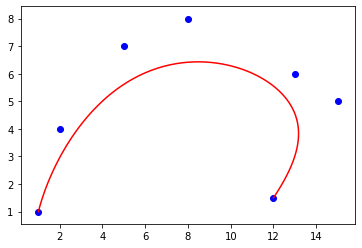

In [4]:
"""Graphe 1 : Courbe selon les points de contrôle"""
#On affiche la courbe.
plt.plot(matriceBezier[0,:], matriceBezier[1, :], color='red')

#On affiche les points de contôle.
plt.scatter(c[0, :], c[1, :], color='blue')
plt.show()

2) Le segment $[c_{0}, c_{1}]$ et $[c_{n-1}, c_{n}]$ sont tangents à la courbe $\gamma_{c}^{n}$ respectivement en $c_{0}$ et $c_{n}$.

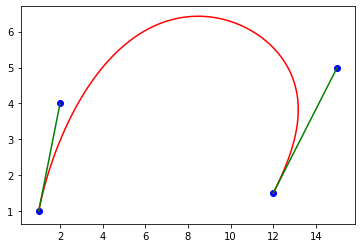

In [5]:
"""Graphe 2 : [c0, c1] et [c5, c6], deux segments tangentes à la courbe"""
#On affiche la courbe.
plt.plot(matriceBezier[0,:], matriceBezier[1, :], color='red')

#On affiche les segments [c0,c1] et [cn-1,cn].
plt.plot([c[0,0], c[0, 1]], [c[1,0], c[1, 1]],color='green')
plt.plot([c[0,N-2], c[0, N-1]], [c[1,N-2], c[1, N-1]],color='green')

#On affiche les points des segments.
plt.scatter(c[0, 0], c[1, 0], color='blue')
plt.scatter(c[0, 1], c[1, 1], color='blue')
plt.scatter(c[0, N-2], c[1, N-2], color='blue')
plt.scatter(c[0, N-1], c[1, N-1], color='blue')
plt.show()

3) Plus m est grand, plus la courbe est lisse.

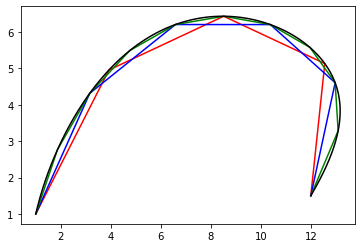

In [6]:
"""'Graphe 3 : Courbes de Bézier avec des pas différents"""
#On calcule les différentes courbes.
matriceBezier1= algorithme_bezier(c, N, 0.25)
matriceBezier2= algorithme_bezier(c, N, 0.2)
matriceBezier3= algorithme_bezier(c, N, 0.1)
matriceBezier4= algorithme_bezier(c, N, 0.001) # pas petit => courbe lisse

#On affiche les courbes.
plt.plot(matriceBezier1[0,:], matriceBezier1[1, :], color='red')
plt.plot(matriceBezier2[0,:], matriceBezier2[1, :], color='blue')
plt.plot(matriceBezier3[0,:], matriceBezier3[1, :], color='green')
plt.plot(matriceBezier4[0,:], matriceBezier4[1, :], color='black')

plt.show()

4) L'ordre dans lequel on considère les points de $c_{i}$ est primordial. Si l'on échange deux points, l'allure de la courbe de Bézier sera modifiée. 

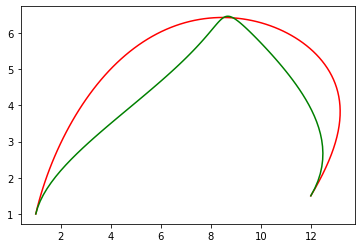

In [7]:
"""Graphe 4 : Courbe avec permutation de c2 et c4"""
#On permute c2 et c4.
a= np.array([[1,2,13,8,5,15,12],[1,4,6,8,7,5,1.5]])

#On calcul la courbe.
matriceBezierPermut=  algorithme_bezier(a, N, 0.01)

#On affiche la courbe permutée (vert) et la courbe de départ (rouge).
plt.plot(matriceBezier[0,:], matriceBezier[1, :], color='red')
plt.plot(matriceBezierPermut[0,:], matriceBezierPermut[1, :], color='green')
plt.show()

5) On peut augmenter la "force de gravité" d'un point par sa duplication et ainsi changer l'allure de la courbe aux endroits proches du point dupliqué.

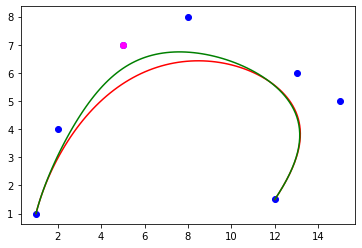

In [8]:
"""Graphe 5 : Duplication d'un point"""
#On duplique c2.
b= np.array([[1,2,5,5,8,13,15,12],[1,4,7,7,8,6,5,1.5]])

#Calcul de la courbe.
matriceBezierAugm=  algorithme_bezier(b, 8, 0.01)

#On affiche les points de contôle.
plt.scatter(c[0, :], c[1, :], color='blue')
plt.scatter(c[0, 2], c[1, 2], color='magenta')

#On affiche les courbes.
plt.plot(matriceBezier[0,:], matriceBezier[1, :], color='red')
plt.plot(matriceBezierAugm[0,:], matriceBezierAugm[1, :], color='green')
plt.show()

6) La courbe est à l'intérieur de l'enveloppe convexe des points de contrôle.

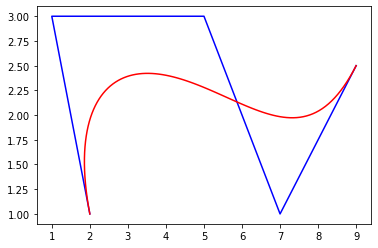

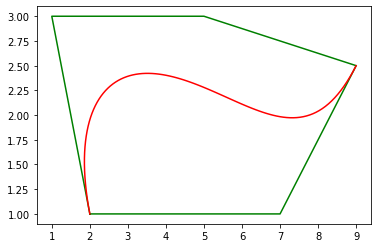

In [9]:
"""Graphe 6 : Enveloppe convexe"""
d= np.array([[2,1,5,7,9],[1,3,3,1,2.5]])

#Calcul de la courbe.
matriceBezierD=  algorithme_bezier(d, 5, 0.01)

#On affiche la courbe.
plt.plot(d[0, :], d[1, :], color='blue')
plt.plot(matriceBezierD[0,:], matriceBezierD[1, :], color='red')

plt.show()

#On affiche l'enveloppe convexe.
plt.plot([d[0, 0], d[0, 1], d[0, 2], d[0, 4], d[0, 3], d[0, 0]],[d[1, 0], d[1, 1], d[1, 2], d[1, 4], d[1, 3], d[1, 0]],color='green')
plt.plot(matriceBezierD[0,:], matriceBezierD[1, :], color='red')

plt.show()

7) Un arc de cercle ne peut pas être décrit par une courbe de Bézier, on ne peut faire que des approximations.

5.0 3.0


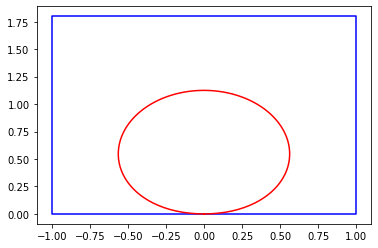

In [10]:
"""Graphe 7 :  Quintique"""
e= np.array([[0,1,1,-1,-1,0],[0,0,1.8,1.8,0,0]])
print(d[0, 2], d[1, 2])

#Calcul de la courbe.
matriceBezierE=  algorithme_bezier(e, 6, 0.01)

#On affiche le polygône des points de contrôle.
plt.plot(e[0, :], e[1, :], color='blue')

#On affiche les courbes.
plt.plot(matriceBezierE[0,:], matriceBezierE[1, :], color='red')
plt.show()

<b>Conclusion</b> : A l'aide de ces propriétés, on en déduit que :
- Chaque courbe associée à un ensemble de points de contrôle est unique.
- Une courbe de Bézier ne peut pas diverger.
- On peut déduire la forme générale des courbes à partir de la ligne brisée des points de contrôle.

## C. Théorème de Bernstein :

### 1/ . Enoncé du théorème : 
Soit $f$ une fonction continue sur [0,1]. Les polynomes
    $$ B_n(f)(t) = \sum \limits_{\underset{}{k=0}}^n f\left(\frac{k}{n}\right)B_k^n(t), $$
convergent uniformement vers $f$ sur [0,1] quand $ n \to \infty $

### 2/. Démonstration:
On a $ f $ est une fonction continue sur [0,1] et montrons les idendités suivantes :
####  a/. $$  \sum \limits_{\underset{}{k=0}}^n B_k^n(t)=1 , \sum \limits_{\underset{}{k=0}}^n kB_k^n(t)=nt , \sum \limits_{\underset{}{k=0}}^n k(k-1)B_k^n(t)=n(n-1)t^2 $$ 
-  Pour $  \sum \limits_{\underset{}{k=0}}^n B_k^n(t)=1$ :
On a que $$  \sum \limits_{\underset{}{k=0}}^n B_k^n(t)= \sum \limits_{\underset{}{k=0}}^n \binom{n}{k}t^k(1-t)^{n-k} $$
D'après la formule du binome : $$ ( a+b)^n= \sum \limits_{\underset{}{k=0}}^n \binom{n}{k}a^kb^{n-k}$$
Donc 
$$  \sum \limits_{\underset{}{k=0}}^n B_k^n(t)= (t +1-t)^n=1^n=1 $$

-  Pour $ \sum \limits_{\underset{}{k=0}}^n kB_k^n(t)=nt $ :
on a $$ \sum \limits_{\underset{}{k=0}}^n kB_k^n(t)= \sum \limits_{\underset{}{k=0}}^n k\binom{n}{k}t^k(1-t)^{n-k} $$
or $$ k\binom{n}{k} = k\frac{n!}{k!(n-k)!}= \frac{n!}{(k-1)!(n-k)!}=\frac{n(n-1)!}{(k-1)!(n-1-(k-1))!}=n\binom{n-1}{k-1} $$
donc $$ \sum \limits_{\underset{}{k=0}}^n kB_k^n(t)= \sum \limits_{\underset{}{k=0}}^n n\binom{n-1}{k-1}t^k(1-t)^{n-k}$$
Or le premier terme de la somme quand $k=0$ est nul donc
 $$ \sum \limits_{\underset{}{k=0}}^n kB_k^n(t)= \sum \limits_{\underset{}{k=1}}^n n\binom{n-1}{k-1}t^k(1-t)^{n-k}\\ = n\sum \limits_{\underset{}{k=1}}^n \binom{n-1}{k-1}t^k(1-t)^{n-k}\\ $$
on fait un changement de variable en posant : $ k'= k-1 $ et donc $ k=k'+1$
Ainsi, si $ k=1$ alors $k'=0$ et si $k=n$ alors $k'=n-1$
On obtient donc 
 $$ \sum \limits_{\underset{}{k=0}}^n kB_k^n(t) = n\sum \limits_{\underset{}{k'=0}}^{n-1} \binom{n-1}{k'}t^{k'+1}(1-t)^{n-k'-1}\\= nt\sum \limits_{\underset{}{k'=0}}^{n-1} \binom{n-1}{k'}t^{k'}(1-t)^{(n-1)-k'} \\  $$
or d'après le point 1 on a que $$ \sum \limits_{\underset{}{k'=0}}^{n-1} \binom{n-1}{k'}t^{k'}(1-t)^{(n-1)-k'}=1 $$
donc on obtient bien $$ \sum \limits_{\underset{}{k=0}}^n kB_k^n(t) = nt $$

-  Pour $ \sum \limits_{\underset{}{k=0}}^n k(k-1)B_k^n(t)=n(n-1)t^2 $ :
on a $$ \sum \limits_{\underset{}{k=0}}^n k(k-1)B_k^n(t)= \sum \limits_{\underset{}{k=0}}^n k(k-1)\binom{n}{k}t^k(1-t)^{n-k} $$
or $$ k(k-1)\binom{n}{k} = k(k-1)\frac{n!}{k!(n-k)!}= \frac{n!}{(k-2)!(n-k)!}=\frac{n(n-1)(n-2)!}{(k-2)!(n-2-(k-2))!}=n(n-1)\binom{n-2}{k-2} $$
donc $$ \sum \limits_{\underset{}{k=0}}^n k(k-1)B_k^n(t)= \sum \limits_{\underset{}{k=0}}^n n(n-1)\binom{n-2}{k-2}t^k(1-t)^{n-k}$$
or les deux premiers termes de la somme quand $k=0$ et $k=1$ respectivement, sont nuls donc
 $$ \sum \limits_{\underset{}{k=0}}^n k(k-1)B_k^n(t)= \sum \limits_{\underset{}{k=2}}^n n(n-1)\binom{n-2}{k-2}t^k(1-t)^{n-k}\\ = n(n-1)\sum \limits_{\underset{}{k=2}}^n \binom{n-2}{k-2}t^k(1-t)^{n-k}\\ $$
On fait un changeent de variable et on pose $ k'= k-2 $ et donc $ k=k'+2$
Ainsi, si $ k=2$ alors $k'=0$ et si $k=n$ alors $k'=n-2$
On obtient donc 
 $$ \sum \limits_{\underset{}{k=0}}^n k(k-1)B_k^n(t) = n(n-1)\sum \limits_{\underset{}{k'=0}}^{n-2} \binom{n-2}{k'}t^{k'+2}(1-t)^{n-k'-2}\\= n(n-1)t^2\sum \limits_{\underset{}{k'=0}}^{n-2} \binom{n-2}{k'}t^{k'}(1-t)^{n-k'-2} \\  $$
or d'après le point 1 on a que $$ \sum \limits_{\underset{}{k'=0}}^{n-2} \binom{n-2}{k'}t^{k'}(1-t)^{n-k'-2}=1 $$
donc on obtient bien $$ \sum \limits_{\underset{}{k=0}}^n k(k-1)B_k^n(t) = n(n-1)t^2 $$

#### b/.  On peut en deduire à partir de ces idendités que :  $$ \sum \limits_{\underset{}{k=0}}^n (k-nt)^2 B_k^n(t) = nt(1-t) $$
en effet on a 
$$ \sum \limits_{\underset{}{k=0}}^n (k-nt)^2 B_k^n(t)= \sum \limits_{\underset{}{k=0}}^n (k^2+n^2t^2-2knt) B_k^n(t)\\
= \sum \limits_{\underset{}{k=0}}^n k^2B_k^n(t)+\sum \limits_{\underset{}{k=0}}^n n^2t^2 B_k^n(t)-\sum \limits_{\underset{}{k=0}}^n 2knt B_k^n(t) \\ =\sum \limits_{\underset{}{k=0}}^n k^2B_k^n(t)+n^2t^2\sum \limits_{\underset{}{k=0}}^n  B_k^n(t)- 2nt\sum \limits_{\underset{}{k=0}}^n k B_k^n(t) $$
or on sais que  $$  \sum \limits_{\underset{}{k=0}}^n B_k^n(t)=1 , \sum \limits_{\underset{}{k=0}}^n kB_k^n(t)=nt $$
donc $$ \sum \limits_{\underset{}{k=0}}^n (k-nt)^2 B_k^n(t)= \sum \limits_{\underset{}{k=0}}^n k^2B_k^n(t)+n^2t^2-2n^2t^2 \\ = \sum \limits_{\underset{}{k=0}}^n k^2B_k^n(t)-n^2t^2 \\ = \sum \limits_{\underset{}{k=0}}^n (k^2-k+k)B_k^n(t)-n^2t^2 \\ = \sum \limits_{\underset{}{k=0}}^n (k^2-k)B_k^n(t)+ \sum \limits_{\underset{}{k=0}}^n kB_k^n(t)-n^2t^2 \\ = \sum \limits_{\underset{}{k=0}}^n k(k-1)B_k^n(t) +\sum \limits_{\underset{}{k=0}}^n kB_k^n(t)-n^2t^2 $$
Or on sait que $$ \sum \limits_{\underset{}{k=0}}^n k(k-1)B_k^n(t)=n(n-1)t^2 $$
Donc $$ \sum \limits_{\underset{}{k=0}}^n (k-nt)^2 B_k^n(t)= n(n-1)t^2+nt-n^2t^2 \\=n^2t^2-nt^2+nt-n^2t^2 $$
Ainsi on obtient bien $$ \sum \limits_{\underset{}{k=0}}^n (k-nt)^2 B_k^n(t)=nt(1-t) $$

#### c/. On remarque que $$f(t)-B_n(f)(t)=f(t)-\sum \limits_{\underset{}{k=0}}^n f\left(\frac{k}{n}\right)B_k^n(t) \\ = f(t)*1-\sum \limits_{\underset{}{k=0}}^n f\left(\frac{k}{n}\right)B_k^n(t)$$
On sait que $  \sum \limits_{\underset{}{k=0}}^n B_k^n(t)=1 $ alors
$$f(t)-B_n(f)(t)=f(t)\sum \limits_{\underset{}{k=0}}^n B_k^n(t)-\sum \limits_{\underset{}{k=0}}^n f\left(\frac{k}{n}\right)B_k^n(t) \\ = \sum \limits_{\underset{}{k=0}}^n f(t) B_k^n(t)-\sum \limits_{\underset{}{k=0}}^n f\left(\frac{k}{n}\right)B_k^n(t) \\ = \sum \limits_{\underset{}{k=0}}^n f(t) B_k^n(t)- f\left(\frac{k}{n}\right)B_k^n(t) \\ = \sum \limits_{\underset{}{k=0}}^n \left[f(t) - f\left(\frac{k}{n}\right)\right]B_k^n(t) $$
Ainsi, on obtient bien $$ f(t)-B_n(f)(t) = \sum \limits_{\underset{}{k=0}}^n \left[f(t) - f\left(\frac{k}{n}\right)\right]B_k^n(t) $$

#### d/. Soit $M=sup_{t \in [0,1]}|f'(t)|$ . On peut montrer que :
$$ |f(t)-B_n(f)(t)|\leqslant M \sum \limits_{\underset{}{k=0}}^n |t-f\left(\frac{k}{n}\right)|B_k^n(t) $$
En effet, pour $ f \in C^1([0,1])$ on a 
$$ f(t)-B_n(f)(t)  = \sum \limits_{\underset{}{k=0}}^n \left[f(t) - f\left(\frac{k}{n}\right)\right]B_k^n(t) $$
on a donc $$ \forall t \in [0,1], |f(t)-B_n(f)(t)|= \left|\sum \limits_{\underset{}{k=0}}^n \left[f(t) - f\left(\frac{k}{n}\right)\right]B_k^n(t)\right|$$
Par l'inégalité triangulaire on obtient que 
$$|f(t)-B_n(f)(t)| \leqslant \sum \limits_{\underset{}{k=0}}^n \left|f(t) - f\left(\frac{k}{n}\right) \right|B_k^n(t) ....(I) $$ 
Or $f$ est continue sur [0,1] et dérivable sur ]0,1[donc d'après l'inégalité des accroissement finis, comme $ \exists M > 0 $ tel que $|f'(t)|\leqslant M $ alors 

$$ \forall t, \frac{k}{n} \in [0,1], \left|f(t)-f\left(\frac{k}{n}\right)\right| \leqslant M \left|t-\frac{k}{n}\right| $$
En appliquant ça à $(I)$ on aura $$|f(t)-B_n(f)(t)| \leqslant \sum \limits_{\underset{}{k=0}}^n \left|f(t) - f\left(\frac{k}{n}\right)\right|B_k^n(t) \leqslant \sum \limits_{\underset{}{k=0}}^n M \left|t-\left(\frac{k}{n}\right)\right|B_k^n(t) \\$$
on obtient bien que $$ |f(t)-B_n(f)(t)| \leqslant M\sum \limits_{\underset{}{k=0}}^n \left|t-\left(\frac{k}{n}\right)\right|B_k^n(t)$$

#### e/. Montrons que $\forall t \in [0,1]$  $$ |f(t)-B_n(f)(t)| \leqslant \frac{M}{\sqrt{n}}\sqrt{t(1-t)} \leqslant \frac{M}{2\sqrt{n}}$$
on a $$|f(t)-B_n(f)(t)| \leqslant  M\sum \limits_{\underset{}{k=0}}^n \left|t-\left(\frac{k}{n}\right)\right|B_k^n(t)=\frac{M}{n}\sum \limits_{\underset{}{k=0}}^n |k-nt|B_k^n(t) \\ =\frac{M}{n}\sum \limits_{\underset{}{k=0}}^n |(k-nt) \sqrt {B_k^n(t)} \sqrt {B_k^n(t)}| $$
d'après l'inégalité de Cauchy-Schwarz on a
$$ \sum \limits_{\underset{}{k=0}}^n |k-nt|B_k^n(t)\leqslant \sqrt {\sum \limits_{\underset{}{k=0}}^n |(k-nt)^2\sqrt {B_k^n(t)}|^2} \sqrt {\sum \limits_{\underset{}{k=0}}^n |\sqrt {B_k^n(t)}|^2}= \sqrt {\sum \limits_{\underset{}{k=0}}^n |k-nt|^2 B_k^n(t)} \sqrt {\sum \limits_{\underset{}{k=0}}^n |B_k^n(t)|} $$
or on sait que $$  \sum \limits_{\underset{}{k=0}}^n (k-nt)^2 B_k^n(t) = nt(1-t) et \sum \limits_{\underset{}{k=0}}^n B_k^n(t)=1 $$
donc $$ \sum \limits_{\underset{}{k=0}}^n |k-nt|B_k^n(t)\leqslant \sqrt 
{nt(1-t)}\sqrt{1} = \sqrt {nt(1-t)}$$
ainsi  $$|f(t)-B_n(f)(t)| \leqslant \frac{M}{n}\sqrt {nt(1-t)}=\frac {M\sqrt{n}\sqrt{t(1-t)}}{\sqrt{n}\sqrt{n}}=\frac{M}{\sqrt{n}}\sqrt{t(1-t)} $$
on a bien $$|f(t)-B_n(f)(t)| \leqslant \frac{M}{\sqrt{n}}\sqrt{t(1-t)} $$

#### Montrons maintenant que  $$|f(t)-B_n(f)(t)| \leqslant \frac{M}{2\sqrt{n}}$$
c'est équivalent à montrer que $$ \sqrt{t(1-t)}  \leqslant \frac{1}{2} $$
on sais que $$ 0 \leqslant t \leqslant 1 \Longrightarrow -1 \leqslant -t \leqslant 0 $$
Comme $t>0$ on a $$ 0 \leqslant  1-t \leqslant 1 \Longrightarrow 0 \leqslant t(1-t) \leqslant t \leqslant 1
\Longrightarrow t(1-t) \leqslant \frac{1}{4}\leqslant 1 $$
ainsi  $$ \sqrt{t(1-t)}  \leqslant \frac{1}{2} $$ 
et donc  $$|f(t)-B_n(f)(t)| \leqslant \frac{M}{2\sqrt{n}}$$
on a   $$ 0 \leqslant |f(t)-B_n(f)(t)|\leqslant   sup_{t\in [0,1]} |f(t)-B_n(f)(t)| \leqslant \frac{M}{2\sqrt{n}} $$
or la limite de $\frac{M}{2\sqrt{n}}$ lorsque n tend vers $+\infty$ vaut 0
donc $$ sup_{t\in [0,1]} |f(t)-B_n(f)(t)| \xrightarrow[n \to \infty]{} 0 $$

ce qui veut dire que $ B_n(f)(t)$ convergent uniformement vers $f$ sur [0,1] quand $ n \to \infty $

## D. Approximation de Bernstein et la vitesse de convergence: 
On va s'intéresser à trois exemples : 
$$f_{1} = |x|, \quad f_{2}(x) = \frac{1}{0.1+x^{2}} \quad et \quad f_{3}(x) = \exp^{-x^{2}} \quad pour \quad x \in [0,1]$$

Le but de cette partie c'est de démontrer graphiquement et numériquement que :
- les polynômes $B_{n}(f)(t)$ convergent uniformément vers $f$ sur $[0,1]$ quand $n \to \infty$;
- la vitesse de convergence des approximations répond à la relation suivante : $|f(t)-B_{n}(f)(t)| \leq \frac{M}{\sqrt{n}}\sqrt{t(1-t)} \leq \frac{M}{2\sqrt{n}}$

### a/. Premier exemple : $f_{x} = |x|$

Comme la fonction est linéaire sur l'intervalle [0,1], la courbe de Bézier est confondue avec la courbe de la fonction pour n'importe quel nombre de points de contrôle.

### b/. Deuxième exemple : $f_{1}(x) = \frac{1}{0.1+x^{2}}$

Le code suivant calcule cinq courbes de Bézier avec 2, 5, 10, 50 et 100 points de contrôle.

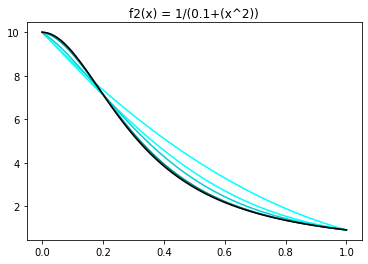

In [11]:
"""Initialisation"""
#On définit plusieurs N.
listeN= np.array([2, 5, 10, 50, 100])

#On définit les points de contrôle selon listeN.
c0= np.array([np.arange(0,1+(1/listeN[0]),1/listeN[0]),1/(0.1+(np.arange(0,1+(1/listeN[0]),1/listeN[0]))**2)])
c1= np.array([np.arange(0,1+(1/listeN[1]),1/listeN[1]),1/(0.1+(np.arange(0,1+(1/listeN[1]),1/listeN[1]))**2)])
c2= np.array([np.arange(0,1+(1/listeN[2]),1/listeN[2]),1/(0.1+(np.arange(0,1+(1/listeN[2]),1/listeN[2]))**2)])
c3= np.array([np.arange(0,1+(1/listeN[3]),1/listeN[3]),1/(0.1+(np.arange(0,1+(1/listeN[3]),1/listeN[3]))**2)])
c4= np.array([np.arange(0,1+(1/listeN[4]),1/listeN[4]),1/(0.1+(np.arange(0,1+(1/listeN[4]),1/listeN[4]))**2)])

"""Calcul des courbes"""
#On calcule les courbes selon listeN.
matriceBezier0= algorithme_bezier(c0, listeN[0]+1, 0.01)
matriceBezier1= algorithme_bezier(c1, listeN[1]+1, 0.01)
matriceBezier2= algorithme_bezier(c2, listeN[2]+1, 0.01)
matriceBezier3= algorithme_bezier(c3, listeN[3]+1, 0.01)
matriceBezier4= algorithme_bezier(c4, listeN[4]+1, 0.01)


"""Graphes des courbes"""
#On affiche les courbes.
plt.plot(matriceBezier0[0,:], matriceBezier0[1, :], color='aqua')
plt.plot(matriceBezier1[0,:], matriceBezier1[1, :], color='cyan')
plt.plot(matriceBezier2[0,:], matriceBezier2[1, :], color='darkturquoise')
plt.plot(matriceBezier3[0,:], matriceBezier3[1, :], color='darkcyan')
plt.plot(matriceBezier4[0,:], matriceBezier4[1, :], color='teal')

"""Graphe de la fonctions"""
#On définit les x et f(x).
x = np.linspace(0, 1, 100)
y = 1/(0.1+(x**2))

#On affiche la courbe de la fonction.
plt.title('f2(x) = 1/(0.1+(x^2))')
plt.plot(x, y, color='black')
plt.show()

Graphiquement on peut voir que plus n est grand plus la courbe converge vers $f$ et les deux deviennent confondues au bout d'un certain n.

On montre par le code suivant que la vitesse de convergence des approximations est bien la relation définie plus haut.

In [12]:
"""Vitesse de convergence"""
#On définit les images de f sur l'intervalle [0,1] avec un pas de 1/110.
fonction= 1/(0.1+(np.arange(0, 1+0.01, 0.01))**2)
# Pour chaque n, on a:
print("Max(|f(t)-Bn(f)(t)| <= 10/2sqrt(n) \n")
print("Pour n= 2")
print(np.amax(np.sqrt((fonction-matriceBezier0[1, :])**2)), "<=", 10/(2*np.sqrt(2)))
print("Pour n= 5")
print(np.amax(np.sqrt((fonction-matriceBezier1[1, :])**2)), "<=", 10/(2*np.sqrt(5)))
print("Pour n= 10")
print(np.amax(np.sqrt((fonction-matriceBezier2[1, :])**2)), "<=", 10/(2*np.sqrt(10)))
print("Pour n= 50")
print(np.amax(np.sqrt((fonction-matriceBezier3[1, :])**2)), "<=", 10/(2*np.sqrt(50)))
print("Pour n= 100")
print(np.amax(np.sqrt((fonction-matriceBezier4[1, :])**2)), "<=", 10/(2*np.sqrt(100)))

Max(|f(t)-Bn(f)(t)| <= 10/2sqrt(n) 

Pour n= 2
1.3185495890502321 <= 3.5355339059327373
Pour n= 5
0.7363916831243045 <= 2.23606797749979
Pour n= 10
0.4446247147898741 <= 1.5811388300841895
Pour n= 50
0.10564296619253444 <= 0.7071067811865475
Pour n= 100
0.05404920857201212 <= 0.5


### c/. Troisième exemple : $f_{2}(x) = \exp^{-x^{2}}$</b>
    
 Même stratégie que le deuxième exemple 

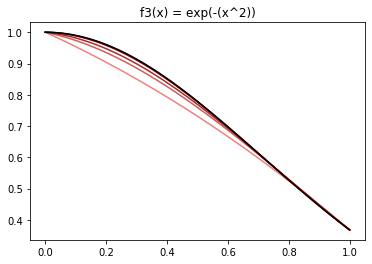

In [13]:
"""Initialisation"""
#On définit les points de contrôle selon listeN.
c0= np.array([np.arange(0,1+(1/listeN[0]),1/listeN[0]),np.exp(-(np.arange(0,1+(1/listeN[0]),1/listeN[0]))**2)])
c1= np.array([np.arange(0,1+(1/listeN[1]),1/listeN[1]),np.exp(-(np.arange(0,1+(1/listeN[1]),1/listeN[1]))**2)])
c2= np.array([np.arange(0,1+(1/listeN[2]),1/listeN[2]),np.exp(-(np.arange(0,1+(1/listeN[2]),1/listeN[2]))**2)])
c3= np.array([np.arange(0,1+(1/listeN[3]),1/listeN[3]),np.exp(-(np.arange(0,1+(1/listeN[3]),1/listeN[3]))**2)])
c4= np.array([np.arange(0,1+(1/listeN[4]),1/listeN[4]),np.exp(-(np.arange(0,1+(1/listeN[4]),1/listeN[4]))**2)])

"""Calcul des courbes"""
#On calcule les courbes selon listeN.
matriceBezier0= algorithme_bezier(c0, listeN[0]+1, 0.01)
matriceBezier1= algorithme_bezier(c1, listeN[1]+1, 0.01)
matriceBezier2= algorithme_bezier(c2, listeN[2]+1, 0.01)
matriceBezier3= algorithme_bezier(c3, listeN[3]+1, 0.01)
matriceBezier4= algorithme_bezier(c4, listeN[4]+1, 0.01)

"""Graphes des courbes"""
#On affiche les courbes.
plt.plot(matriceBezier0[0,:], matriceBezier0[1, :], color='lightcoral')
plt.plot(matriceBezier1[0,:], matriceBezier1[1, :], color='indianred')
plt.plot(matriceBezier2[0,:], matriceBezier2[1, :], color='brown')
plt.plot(matriceBezier3[0,:], matriceBezier3[1, :], color='firebrick')
plt.plot(matriceBezier4[0,:], matriceBezier4[1, :], color='darkred')

"""Graphe de la fonctions"""
#On définit les x et f(x).
x = np.linspace(0, 1, 100)
y = np.exp(-(x**2))

#On affiche la courbe de la fonction.
plt.title('f3(x) = exp(-(x^2))')
plt.plot(x, y, color='black')
plt.show()

In [14]:
"""Vitesse de convergence"""
#On définit les images de f sur l'intervalle [0,1] avec un pas de 1/110.
fonction= np.exp(-(np.arange(0, 1+0.01, 0.01)**2))

# Pour chaque n, on 
print("Max(|f(t)-Bn(f)(t)| <= 10/2sqrt(n) \n")
print("Pour n= 2")
print(np.amax(np.sqrt((fonction-matriceBezier0[1, :])**2)), "<=", 10/(2*np.sqrt(2)))
print("Pour n= 5")
print(np.amax(np.sqrt((fonction-matriceBezier1[1, :])**2)), "<=", 10/(2*np.sqrt(5)))
print("Pour n= 10")
print(np.amax(np.sqrt((fonction-matriceBezier2[1, :])**2)), "<=", 10/(2*np.sqrt(10)))
print("Pour n= 50")
print(np.amax(np.sqrt((fonction-matriceBezier3[1, :])**2)), "<=", 10/(2*np.sqrt(50)))
print("Pour n= 100")
print(np.amax(np.sqrt((fonction-matriceBezier4[1, :])**2)), "<=", 10/(2*np.sqrt(100)))

Max(|f(t)-Bn(f)(t)| <= 10/2sqrt(n) 

Pour n= 2
0.06374898491474557 <= 3.5355339059327373
Pour n= 5
0.028630815903785356 <= 2.23606797749979
Pour n= 10
0.0149781539322279 <= 1.5811388300841895
Pour n= 50
0.0031164430161798595 <= 0.7071067811865475
Pour n= 100
0.0015663102867732315 <= 0.5


### c/.  Conclusion: 
Le théorème de Bernstein est intéressant car il démontre que les courbes de Bézier peuvent être beaucoup plus précises que ce que l'on avait conclu avant. On verra plus tard les conséquences de ce théorème en détails.

## E. Interprétation géométrique des courbes de Berntein: 
En 1975, W. Böhm rendu public les travaux de Paul de Casteljau, ingénieur chez Citroën de Casteljau inventa un algorithme géométrique permettant de dessiner les courbes de Bézier à partir des mêmes données de départ. Cet algorithme a l'avantage de donner une interprétation géométrique simple de la courbe de Bézier.<br>
Dans cette partie, nous allons définir l'algorithme de Casteljau, illustrer son fonctionnement, étudier son lien avec les courbes de Bézier et le comparer avec l'algorithme des polynômes de Bernstein.
### a/.  Définition de l'algorithme de Casteljau:
On rappelle que la courbe de Bézier a comme points de contrôle $c_{0}...c_{n}$.<br><br>
L'algorithme de Casteljau est un algorithme permettant la construction par barycentrages successifs, des points d'une courbe de Bézier.<br>
On prend $t \in [0,1]$, et on définit par récurrence des points
$$ c_{0}^{1} = (1-t)c_{0} + tc_{1}, c_{1}^{1} = (1-t)c_{1} + tc_{2}, ..., c_{n-1}^{1} = (1-t)c_{n-1} + tc_{n} $$
puis
$$ c_{0}^{2} = (1-t)c_{0}^{1}(t) + tc_{1}^{1}(t), ..., c_{n-2}^{2}(t) = (1-t)c_{n-2}^{1}(t) + tc_{n-1}^{1}(t) $$
et ainsi de suite jusqu'à arriver à un point unique
$$ c_{0}^{n}(t) = (1-t)c_{0}^{n-1}(t)+tc_{1}^{n-1}(t) $$

Ce point unique appartient à la courbe de Bézier.

#### . Remarque: 
L'algorithme de Casteljau permet de calculer les tangentes des différents points de la courbe. 

### b/. Lien entre la courbe de Bézier $\gamma_{c}^{n}$ et de Casteljau $\delta_{c}^{n}$ :
On cherche à montrer par récurence la propriété suivante : $$ (P_n) : \gamma_c^{n}(t) = \delta_c^{n}(t) = c_0^{n}(t) $$ <br>
On note $ c'= c_0,....,c_n-1 $ et $ c''=c_1,....c_n$  et d'après la construction de l'algorithme de Casteljau on : <br>
$c_0^{n-1}= (1-t)c_0^{n-2}+t c_1^{n-2}$<br>
$c_1^{n-1}= (1-t)c_1^{n-2}+t c_2^{n-2}$<br>
$c_0^{n}= (1-t)c_0^{n-1}+t c_1^{n-1} = \delta_c^{n}(t)$<br>
#### Initialisation pour n=1: 
D'une part on a d'après l'algorithme de Casteljau $ c_0^{1}(t)= (1-t)c_0 + tc_1 $ <br>
et d'autre part on a : <br>
$ \gamma_c^{1}(t)=  \sum \limits_{\underset{}{k=0}}^1 c_k B_k^1(t) = c_0 B_k^0(t)+ c_1 B_k^1(t)\\$
or $$ B_k^0(t) = \binom{1}{0}t^0(1-t)^{1} = \frac{1!}{0!1!} (1-t)=(1-t) $$
$$ B_1^1(t) = \binom{1}{1}t^1(1-t)^{0} =\frac{1!}{1!0!} t = t $$
Donc $\gamma_c^{1}(t)= c_0 (1-t) + c_1 t = c_0^{1}(t)=\delta_c^{1}(t) $  donc $(P_n) $vraie pour n=1. 

#### hérédité: Supposons que $(P_n)$ est vraie pour n-1 et montrons qu'elle est aussi vraie pour n: <br>
 ie : on a $ \gamma_{c'}^{n-1}(t) =  c_0^{n-1}(t) $ et $ \gamma_{c''}^{n-1}(t) =  c_1^{n-1}(t) \\ $ et on cherche à montrer que $c_0^{n}=\gamma_c^{n}(t) $

On a $c_0^{n}= (1-t)c_0^{n-1}+t c_1^{n-1} = (1-t) \gamma_{c'}^{n-1}(t)+ t\gamma_{c''}^{n-1}(t)$
D'après l'hypothèse de récurence on a : <br>
$c_0^{n}= (1-t) \sum \limits_{\underset{}{k=0}}^{n-1} c_k\binom{n-1}{k}t^k(1-t)^{n-1-k}+t \sum \limits_{\underset{}{k=0}}^{n-1} c_{k+1}\binom{n-1}{k}t^k(1-t)^{n-1-k}$<br>
$c_0^{n}= \sum \limits_{\underset{}{k=0}}^{n-1} c_{k}\binom{n-1}{k}t^k(1-t)^{n-k} + \sum \limits_{\underset{}{k=0}}^{n-1} c_{k+1}\binom{n-1}{k}t^{k+1}(1-t)^{n-1-k}$<br> $
$ $c_0^{n}= \sum \limits_{\underset{}{k=0}}^{n-1} c_{k}\binom{n-1}{k}t^k(1-t)^{n-k} + \sum \limits_{\underset{}{k=0}}^{n-1} c_{k+1}\binom{n-1}{k}t^{k}(1-t)^{n-1-k}$<br>
$c_0^{n}= \sum \limits_{\underset{}{k=1}}^{n-1} c_{k}\binom{n-1}{k}t^k(1-t)^{n-k} + \sum \limits_{\underset{}{k'=1}}^{n-1} c_{k'}\binom{n-1}{k'-1}t^{k'}(1-t)^{n-k'}+ c_0(1-t)^n + c_nt^n $ <br>
$ c_0^{n}= \sum \limits_{\underset{}{k=1}}^{n-1} c_{k} \left(\binom{n-1}{k}+\binom{n-1}{k-1}\right )t^k(1-t)^{n-k} + c_0(1-t)^n + c_nt^n $ <br>  avec $ k'=k+1 $ donc $k=k'-1$ et si $k=n-1 $ alors $k'=n$
Or d'après le triangle de pascal on a $ \binom{n-1}{k}+\binom{n-1}{k-1}=\binom{n}{k}$ <br> ce qui donne :
$c_0^{n}= \sum \limits_{\underset{}{k=1}}^{n-1} c_{k}\binom{n}{k}t^k(1-t)^{n-k} + c_0(1-t)^n + c_nt^n =
 \sum \limits_{\underset{}{k=0}}^{n} c_{k}\binom{n}{k}t^k(1-t)^{n-k} $ <br>
Donc $c_0^{n}=\gamma_c^{n}(t) $
#### Conclusion:  $(P_n)$ est vraie pour tout n $\geq 1$




### c/. Illustration de l'algorithme:
Dans l'exemple suivant, on va déterminer le point de la courbe associée à
$c=\left(
\begin{array}{ccccc}
1&2&5&8&9\\
1&4&5&4&1
\end{array}
\right)$
pour $t=\frac{1}{2}$.

- $T[0]=[c]=[c_{0}, c_{1}, c_{2}, c_{3}, c_{4}] \quad c_{0}, c_{1}, c_{2}, c_{3}, c_{4} \in \mathbb{R}^{2}$<br><br>
- $T[1]=[\frac{c_{0}+c_{1}}{2}, \frac{c_{1}+c_{2}}{2}, \frac{c_{2}+c_{3}}{2},\frac{c_{3}+c_{4}}{2}]=[c_{0}^{1}, c_{1}^{1}, c_{2}^{1},c_{3}^{1}]$<br><br>
- $T[2]=[\frac{c_{0}^{1}+c_{1}^{1}}{2}, \frac{c_{1}^{1}+c_{2}^{1}}{2},\frac{c_{2}^{1}+c_{3}^{1}}{2}]=[c_{0}^{2}, c_{1}^{2},c_{2}^{2}]$<br><br>
- $T[3]=[\frac{c_{0}^{2}+c_{1}^{2}}{2},\frac{c_{1}^{2}+c_{2}^{2}}{2}]=[c_{0}^{3},c_{1}^{3}]$<br><br>
- $T[4]=[\frac{c_{0}^{3}+c_{1}^{3}}{2}]=[c_{0}^{4}]\to$  Notre point de la courbe.

Le graphe ci-dessous illustre le calcul précédent. 

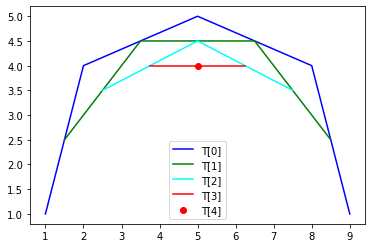

In [15]:
"""Calcul du point de la courbe"""
#On définit nos points de contrôle.
r= np.array([[1,2,5,8,9],[1,4,5,4,1]])

#On définit notre tableau de travail.
T= np.zeros((5,2,5))
T[0]= r

#On calcule le point de la courbe selon t=1/2
for i in range(1, 5):
    for j in range(0, 5-i):
        T[i][0][j]= (T[i-1][0][j]+T[i-1][0][j+1])/2
        T[i][1][j]= (T[i-1][1][j]+T[i-1][1][j+1])/2
             
"""Graphe de l'algorithme"""
plt.plot(T[0][0][0:5], T[0][1][0:5], color='blue', label="T[0]")
plt.plot(T[1][0][0:4], T[1][1][0:4], color='green', label="T[1]")
plt.plot(T[2][0][0:3], T[2][1][0:3], color='cyan', label="T[2]")
plt.plot(T[3][0][0:2], T[3][1][0:2], color='red', label='T[3]')
plt.scatter(T[4][0][0], T[4][1][0], color='red', label="T[4]")
plt.legend()
plt.show()

### d/. Implémentation de l'algorithme de Casteljau:
L'algorithme se résume donc à faire le calcul précedent pour l'ensemble de T.

In [16]:
"""Fonctions"""
def algorithme_casteljau (c, N, pas):
    
    #On définit l'ensemble des t selon une précision choisie.
    t= np.arange(0, 1+pas, pas)

    #On définit notre matrice de points de la courbe.
    matriceCasteljau= np.zeros((2,np.size(t)))
    
    #On calcule le point T[] selon t.
    for k in range (0, np.size(t)):
        #On définit notre tableau de travail T.
        T= np.zeros((N,2,N))
        T[0]= c
        
        #On calcule les points de la courbe selon t.
        for i in range(1, N):
            for j in range(0, N-i):
                T[i][0][j]= (1-t[k])*T[i-1][0][j] + t[k]*T[i-1][0][j+1]
                T[i][1][j]= (1-t[k])*T[i-1][1][j] + t[k]*T[i-1][1][j+1]
        #On stocke le point unique Cn0 dans matriceCasteljau.
        matriceCasteljau[0][k]= T[N-1][0][0]
        matriceCasteljau[1][k]= T[N-1][1][0]
        
    return matriceCasteljau

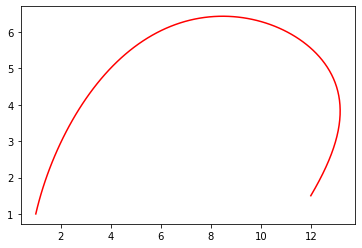

In [17]:
"""Programme"""
N= 7

#Matrice des points de contrôle de taille 2*N.
c= np.array([[1,2,5,8,13,15,12],[1,4,7,8,6,5,1.5]])

#On calcule les points de la courbe selon c.
T= algorithme_casteljau(c, N, 0.01)
T2= np.zeros((N,2,N))

#On affiche la courbe.
plt.plot(T[0,:], T[1, :], color='red')
plt.show()

### e/. Comparaison de la vitesse d'exécution des deux méthodes: 
Nous allons comparer le temps d'exécution entre <i>algorithme_bezier()</i> et <i>algorithme_casteljau()</i> sur des mêmes exemples : l'approximation de la courbe associée à $f_{2}(x) = \frac{1}{0.1+x^{2}}$, $f_{3}(x) = \exp^{-x^{2}}$ (pour 100 points de contrôle) et
$c=\left(
\begin{array}{ccccccc}
1&2&5&8&13&15&12\\
1&4&7&8&6&5&1.5
\end{array}
\right)$.

On va utiliser une nouvelle bibliothèque : <i>time</i>

 En effet: Cette bibliothèque contient la fonction <i>time.clock</i> pour mesurer le temps d'exécution d'une partie du code en utilisant la fonction time.clock() qui renvoie le temps CPU en secondes. La différence entre 2 de ces différents temps donnera le temps d'éxécution de la partie du code encadrée.

In [18]:
import time

#### . Exécution du test : 


In [19]:
"""Premier Test"""
#Points de contrôle.
c0= np.array([np.arange(0,1+(1/listeN[4]),1/listeN[4]),1/(0.1+(np.arange(0,1+(1/listeN[4]),1/listeN[4]))**2)])

#On calcule et affiche le temps d'exécution de algorithme_bezier().
start= time.clock() # pour donner l'heure de l'ordinateur
algorithme_bezier (c0, listeN[4]+1, 0.01)
end= time.clock()   # l'heure après l'exécution de l'algorithme

print("Test 1 :")
print(end-start)    

#On calcule et affiche le temps d'exécution de algorithme_casteljau().
start= time.clock()
algorithme_casteljau (c0, listeN[4]+1, 0.01)
end= time.clock()

print(end-start, "\n\n")


"""Deuxième test"""
#Points de contrôle.
c1= np.array([np.arange(0,1+(1/listeN[4]),1/listeN[4]),np.exp(-(np.arange(0,1+(1/listeN[4]),1/listeN[4]))**2)])

#On calcule et affiche le temps d'exécution de algorithme_bezier().
start= time.clock()
algorithme_bezier (c1, listeN[4]+1, 0.01)
end= time.clock()

print("Test 2 :")
print(end-start)

#On calcule et affiche le temps d'exécution de algorithme_casteljau().
start= time.clock()
algorithme_casteljau (c1, listeN[4]+1, 0.01)
end= time.clock()

print(end-start, "\n\n")


"""Troisième test"""
#Points de contrôle.
c3= np.array([[1,2,5,8,13,15,12],[1,4,7,8,6,5,1.5]])

#On calcule et affiche le temps d'exécution de algorithme_bezier().
start= time.clock()
algorithme_bezier (c3, 7, 0.01)
end= time.clock()

print("Test 3 :")
print(end-start)

#On calcule et affiche le temps d'exécution de algorithme_casteljau().
start= time.clock()
algorithme_casteljau (c3, 7, 0.01)
end= time.clock()

print(end-start, "\n\n")

C:\Users\Tomoco\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
C:\Users\Tomoco\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
C:\Users\Tomoco\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


Test 1 :
0.009550423000000308


C:\Users\Tomoco\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  app.launch_new_instance()
C:\Users\Tomoco\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
C:\Users\Tomoco\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
C:\Users\Tomoco\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


2.0426272259999996 


Test 2 :
0.0020405700000001303
1.996547490000001 


Test 3 :
0.0010497009999994589
0.008730097000000825 




C:\Users\Tomoco\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
C:\Users\Tomoco\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
C:\Users\Tomoco\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
C:\Users\Tomoco\Anaconda3\lib\site-packages\ipykernel_launcher.py:54: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
C:\Users\Tomoco\Anaconda3\lib\site-packages\ipykernel_launcher.py:56: DeprecationWarning: time.clock has bee

# 3. Application à la construction automobile et extension de la méthode: 
## A. Un exemple de voiture:

Dans cette partie, nous allons voir comment dessiner grossièrement une voiture vue de profil. L’ensemble des points de contrôle suivants permettent de schématiser notre voiture :

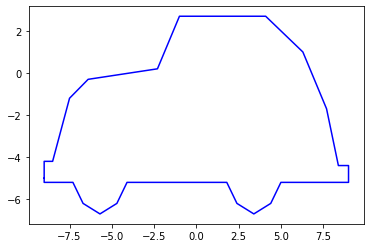

In [20]:
N= 28

c= np.array([[-9,-9,-8.5,-7.5,-6.4,-2.3,-1,4.1,6.3,7.7,8.4,9,9,5.6,5,4.4,3.4,2.4,1.8,-2.3,-4.1,-4.7,-5.7,-6.7,-7.3,-9,-9,-9],
            [-5,-4.2,-4.2,-1.2,-0.3,0.2,2.7,2.7,1,-1.7,-4.4,-4.4,-5.2,-5.2,-5.2,-6.2,-6.7,-6.2,-5.2,-5.2,-5.2,-6.2,-6.7,-6.2,-5.2,-5.2,-5,-5]])

#On affiche le polygone des points de contrôle.
plt.plot(c[0][:], c[1][:], color='blue')

Essayons d'appliquer la fonction <i>algorithme_bezier()</i> à notre ensemble de points de contrôle :

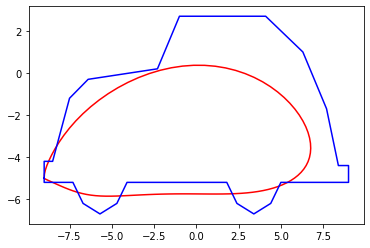

In [21]:
courbeBezier= algorithme_bezier(c,N,0.01)

plt.plot(courbeBezier[0][:], courbeBezier[1][:], color='red')
plt.plot(c[0][:], c[1][:], color='blue')

plt.show()

Le résultat n'est pas satisfaisant, il est même décevant. Pour pallier à ce problème, nous allons nous intéresser à un nouvelle notion : l'ordre des courbes de Bézier.

Une façon d’améliorer les courbes de Bézier est de considérer les courbes, non pas comme des simples figures géométriques, mais comme des ensembles de courbes de Bézier.

Cette notion se formalise de la manière suivante :

<b>Définition</b> Une courbe de Bézier d'ordre n est une courbe ayant n+1 points de contrôle $[ P_{0}, P_{1},...,P_{N+1} ]$.

Essayons de nouveau avec cette fois-ci non pas une seul courbe mais avec 13 courbes de Bézier d'ordre 2 (courbes quadratique).

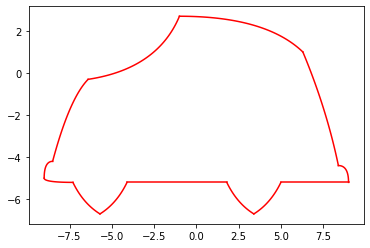

In [22]:
"""Approximation par les courbes de Bézier quadratique"""

#On définit notre tableau de travail (ce tableau va contenir l'ensemble des points de contrôle des courbes).
T= np.zeros((13,2,3))

#On remplit notre tableau des points de contrôle.
for i in range(13):
    T[i]= c[:2,i*2:3+i*2]
    
#On définit le tableau des courbes de bézier d'ordre 2.
CourbeBezierOrdre2= np.zeros((13,2,101))

#On calcule l'ensemble des courbes.
for i in range(13):
    CourbeBezierOrdre2[i]= algorithme_bezier(T[i], 3, 0.01)
    
#On affiche l'ensemble des courbes.
for i in range(13):
    plt.plot(CourbeBezierOrdre2[i,0,:], CourbeBezierOrdre2[i,1,:], color='red')
    
plt.show()

Le résultat est beaucoup plus intéressant. Maintenant, essayons avec 9 courbes de Bézier d'ordre 3 (courbes cubiques).

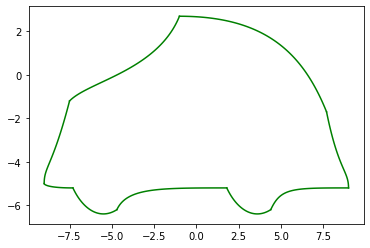

In [23]:
"""Approximation par les courbes de Bézier cubique"""

#On définit notre tableau de travail.
T= np.zeros((9,2,4))

#On remplit notre tableau des points de contrôle.
for i in range(9):
    T[i]= c[:2,i*3:1+(i+1)*3]
    
#On définit le tableau des courbes de bézier d'ordre 3.
CourbeBezierOrdre3= np.zeros((9,2,101))

#On calcule l'ensemble des courbes.
for i in range(9):
    CourbeBezierOrdre3[i]= algorithme_bezier(T[i], 4, 0.01)
    
#On affiche l'ensemble des courbes.
for i in range(9):    
    plt.plot(CourbeBezierOrdre3[i,0,:], CourbeBezierOrdre3[i,1,:], color='green')
    
plt.show()

Là encore, le résultat est bien mieux. De ces deux résultats, on peut faire quelques remarques : l'ensemble des courbes cubique forme une courbe "plus lisse" mais moins précise localement que les quadratiques. Ce résultat est assez simple à comprendre : on a vu que les courbes de Bézier associée aux points $c_{0},...,c_{n}$ passe par les points $c_{0}$ et $c_{n}$ mais pas, en général, par les autres points ; comme les courbes quadratiques ont 3 points de contrôle contre 4 pour les courbes cubiques, l'ensemble des courbes de quadratiques passe par plus de points de contrôle que l'ensemble des courbes cubique, il y a donc plus de chance qu'elle respecte les formes locales - comme le pare choc.

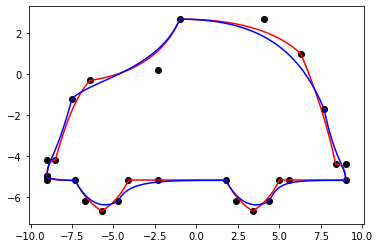

In [24]:
"""Comparaison des deux deux courbes"""

#On affiche l'ensemble des courbes d'ordre 2.
for i in range(13):
    plt.plot(CourbeBezierOrdre2[i,0,:], CourbeBezierOrdre2[i,1,:], color='red')
    
#On affiche l'ensemble des courbes d'ordre 3.
for i in range(9):    
    plt.plot(CourbeBezierOrdre3[i,0,:], CourbeBezierOrdre3[i,1,:], color='blue')
    
#On affiche les points de contrôle.
plt.scatter(c[0][:], c[1][:], color='black')
plt.show()

Néanmoins, dans la pratique, les courbes d'ordre 3 restent plus intéressantes car elles permettent de comprendre intuitivement le comportement des courbes de manière précise. C'est ce que nous allons voir dans la prochaine section.

## B. Les courbes de Bézier cubiques:

Reprenons un exemple simple :

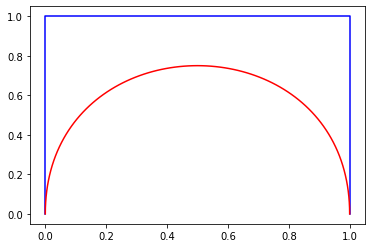

In [25]:
c= np.array([[0,0,1,1],[0,1,1,0]])

courbeBezier= algorithme_bezier(c,4,0.01)

#On affiche le polygone des points de contrôle.
plt.plot(c[0][:], c[1][:], color='blue')

#On affiche la courbe.
plt.plot(courbeBezier[0][:], courbeBezier[1][:], color='red')

plt.show()

Cette foic-ci, nous allons considérer les points de contrôle $c_{0}, c_{1}, c_{n-1},$ et $c_{n}$ comme les composants de deux vecteurs qui determinent la forme de la courbe : à savoir $\overrightarrow{c_{0}c_{1}}$ et $\overrightarrow{c_{n}c_{n-1}}$.

Voici ce que cela donne ci-dessous :

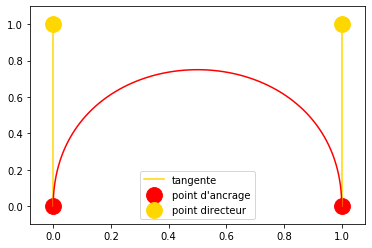

In [26]:
c= np.array([[0,0,1,1],[0,1,1,0]])

courbeBezier= algorithme_bezier(c,4,0.01)

#On affiche les tangentes.
plt.plot([c[0][0],c[0][1]], [c[1][0],c[1][1]], color='gold', label='tangente')
plt.plot([c[0][2],c[0][3]], [c[1][2],c[1][3]], color='gold')

#On affiche les points d'ancrage.
plt.scatter([c[0][0]], [c[1][0]], color='red', label='point d\'ancrage', s=250)
plt.scatter([c[0][3]], [c[1][3]], color='red', s=250)


#On affiche les points directeurs.
plt.scatter([c[0][1]], [c[1][1]], color='gold', label='point directeur', s=250)
plt.scatter([c[0][2]], [c[1][2]], color='gold', s=250)

#On affiche la courbe.
plt.plot(courbeBezier[0][:], courbeBezier[1][:], color='red')

plt.legend()
plt.show()

Les points d'ancrage ($c_{0}$ et $c_{n}$) définissent le début et la fin de la courbe; les points directeurs ($c_{1}$ et $c_{n-1}$) donnent la direction de la courbe; et les tangentes donnent l'amplitude de la courbe.

Quelques exemples pour ce familiariser avec cette méthode :

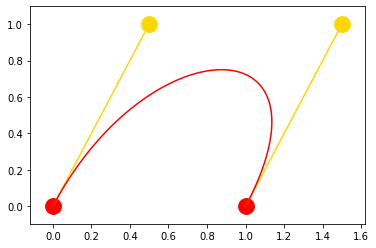

In [27]:
c= np.array([[0,0.5,1.5,1],[0,1,1,0]])

courbeBezier= algorithme_bezier(c,4,0.01)

#On affiche les tangentes.
plt.plot([c[0][0],c[0][1]], [c[1][0],c[1][1]], color='gold', label='tangente')
plt.plot([c[0][2],c[0][3]], [c[1][2],c[1][3]], color='gold')

#On affiche les points d'ancrage.
plt.scatter([c[0][0]], [c[1][0]], color='red', label='point d\'ancrage', s=250)
plt.scatter([c[0][3]], [c[1][3]], color='red', s=250)


#On affiche les points directeurs.
plt.scatter([c[0][1]], [c[1][1]], color='gold', label='point directeur', s=250)
plt.scatter([c[0][2]], [c[1][2]], color='gold', s=250)

#On affiche la courbe.
plt.plot(courbeBezier[0][:], courbeBezier[1][:], color='red')

plt.show()

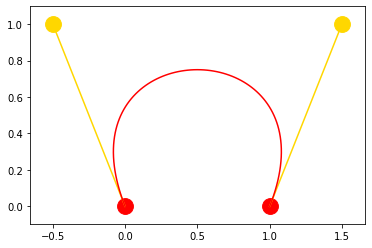

In [28]:
c= np.array([[0,-0.5,1.5,1],[0,1,1,0]])

courbeBezier= algorithme_bezier(c,4,0.01)

#On affiche les tangentes.
plt.plot([c[0][0],c[0][1]], [c[1][0],c[1][1]], color='gold', label='tangente')
plt.plot([c[0][2],c[0][3]], [c[1][2],c[1][3]], color='gold')

#On affiche les points d'ancrage.
plt.scatter([c[0][0]], [c[1][0]], color='red', label='point d\'ancrage', s=250)
plt.scatter([c[0][3]], [c[1][3]], color='red', s=250)


#On affiche les points directeurs.
plt.scatter([c[0][1]], [c[1][1]], color='gold', label='point directeur', s=250)
plt.scatter([c[0][2]], [c[1][2]], color='gold', s=250)

#On affiche la courbe.
plt.plot(courbeBezier[0][:], courbeBezier[1][:], color='red')

plt.show()

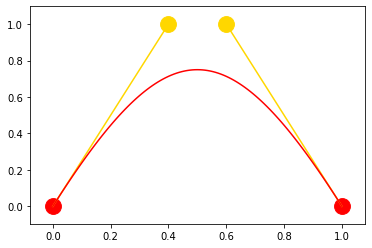

In [29]:
c= np.array([[0,0.4,0.6,1],[0,1,1,0]])

courbeBezier= algorithme_bezier(c,4,0.01)

#On affiche les tangentes.
plt.plot([c[0][0],c[0][1]], [c[1][0],c[1][1]], color='gold', label='tangente')
plt.plot([c[0][2],c[0][3]], [c[1][2],c[1][3]], color='gold')

#On affiche les points d'ancrage.
plt.scatter([c[0][0]], [c[1][0]], color='red', label='point d\'ancrage', s=250)
plt.scatter([c[0][3]], [c[1][3]], color='red', s=250)


#On affiche les points directeurs.
plt.scatter([c[0][1]], [c[1][1]], color='gold', label='point directeur', s=250)
plt.scatter([c[0][2]], [c[1][2]], color='gold', s=250)

#On affiche la courbe.
plt.plot(courbeBezier[0][:], courbeBezier[1][:], color='red')

plt.show()

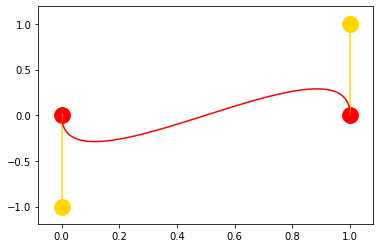

In [30]:
c= np.array([[0,0,1,1],[0,-1,1,0]])

courbeBezier= algorithme_bezier(c,4,0.01)

#On affiche les tangentes.
plt.plot([c[0][0],c[0][1]], [c[1][0],c[1][1]], color='gold', label='tangente')
plt.plot([c[0][2],c[0][3]], [c[1][2],c[1][3]], color='gold')

#On affiche les points d'ancrage.
plt.scatter([c[0][0]], [c[1][0]], color='red', label='point d\'ancrage', s=250)
plt.scatter([c[0][3]], [c[1][3]], color='red', s=250)


#On affiche les points directeurs.
plt.scatter([c[0][1]], [c[1][1]], color='gold', label='point directeur', s=250)
plt.scatter([c[0][2]], [c[1][2]], color='gold', s=250)

#On affiche la courbe.
plt.plot(courbeBezier[0][:], courbeBezier[1][:], color='red')

plt.show()

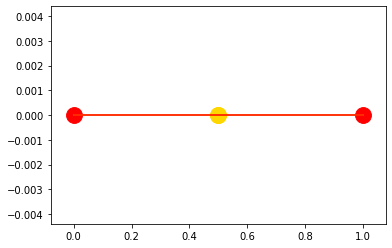

In [31]:
c= np.array([[0,0.5,0.5,1],[0,0,0,0]])

courbeBezier= algorithme_bezier(c,4,0.01)

#On affiche les tangentes.
plt.plot([c[0][0],c[0][1]], [c[1][0],c[1][1]], color='gold', label='tangente')
plt.plot([c[0][2],c[0][3]], [c[1][2],c[1][3]], color='gold')

#On affiche les points d'ancrage.
plt.scatter([c[0][0]], [c[1][0]], color='red', label='point d\'ancrage', s=250)
plt.scatter([c[0][3]], [c[1][3]], color='red', s=250)


#On affiche les points directeurs.
plt.scatter([c[0][1]], [c[1][1]], color='gold', label='point directeur', s=250)
plt.scatter([c[0][2]], [c[1][2]], color='gold', s=250)

#On affiche la courbe.
plt.plot(courbeBezier[0][:], courbeBezier[1][:], color='red')

plt.show()

L'outil plume est un outil que l'on trouve dans Photoshop. Il permet de créer des courbes de Bézier d'ordre 3 et son principe est exactement le même que le nôtre : pour créer une courbe, on définit le premier vecteur et puis le second.

Pour finir, nous allons créer quelques dessins à l'aide de cette méthode.

## C. Quelques dessins :

### Croissant de Lune :

Commençons par un exemple facile : un croissant de lune. La construction se résume à deux courbes ayant la même direction mais l'une a des tangentes plus longues que l'autre.

Voici le résultat :

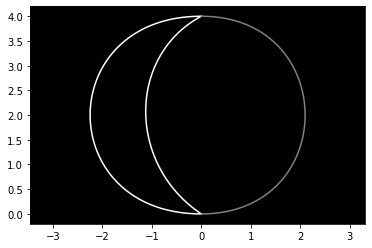

In [32]:
#On définit nos points de contrôle.
a= np.array([[0,-3,-3,0],
             [0,0,4,4]])
b= np.array([[0,-1.5,-1.5,0],
             [0,1,3.2,4]])
c= np.array([[0,2.8,2.8,0],
             [0,0,4,4]])

#On calcule nos courbes
courbeBeziera= algorithme_bezier(a,4,0.01)
courbeBezierb= algorithme_bezier(b,4,0.01)
courbeBezierc= algorithme_bezier(c,4,0.01)

#On définit le fond de notre graphique.
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.set_facecolor((0, 0, 0))
plt.axis('equal')

#On affiche nos courbes.
plt.plot(courbeBeziera[0][:], courbeBeziera[1][:], color='white', linewidth=1.5)
plt.plot(courbeBezierb[0][:], courbeBezierb[1][:], color='white', linewidth=1.5)
plt.plot(courbeBezierc[0][:], courbeBezierc[1][:], color='gray', linewidth=1.5)

On peut aussi réaliser le dessin avec les vecteurs :

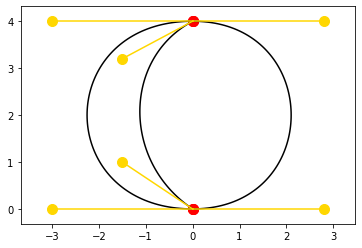

In [33]:
plt.axis('equal')
#On affiche nos courbes.
plt.plot(courbeBeziera[0][:], courbeBeziera[1][:], color='black', linewidth=1.5)
plt.plot(courbeBezierb[0][:], courbeBezierb[1][:], color='black', linewidth=1.5)
plt.plot(courbeBezierc[0][:], courbeBezierc[1][:], color='black', linewidth=1.5)

#On affiche les vecteurs.

#On affiche les tangentes.
plt.plot([a[0][0],a[0][1]], [a[1][0],a[1][1]], color='gold', label='tangente')
plt.plot([a[0][2],a[0][3]], [a[1][2],a[1][3]], color='gold')

plt.plot([b[0][0],b[0][1]], [b[1][0],b[1][1]], color='gold', label='tangente')
plt.plot([b[0][2],b[0][3]], [b[1][2],b[1][3]], color='gold')

plt.plot([c[0][0],c[0][1]], [c[1][0],c[1][1]], color='gold', label='tangente')
plt.plot([c[0][2],c[0][3]], [c[1][2],c[1][3]], color='gold')

#On affiche les points d'ancrage.
plt.scatter([a[0][0]], [a[1][0]], color='red', label='point d\'ancrage', s=100)
plt.scatter([a[0][3]], [a[1][3]], color='red', s=100)

plt.scatter([b[0][0]], [b[1][0]], color='red', label='point d\'ancrage', s=100)
plt.scatter([b[0][3]], [b[1][3]], color='red', s=100)

plt.scatter([c[0][0]], [c[1][0]], color='red', label='point d\'ancrage', s=100)
plt.scatter([c[0][3]], [c[1][3]], color='red', s=100)

#On affiche les points directeurs.
plt.scatter([a[0][1]], [a[1][1]], color='gold', label='point directeur', s=100)
plt.scatter([a[0][2]], [a[1][2]], color='gold', s=100)

plt.scatter([b[0][1]], [b[1][1]], color='gold', label='point directeur', s=100)
plt.scatter([b[0][2]], [b[1][2]], color='gold', s=100)

plt.scatter([c[0][1]], [c[1][1]], color='gold', label='point directeur', s=100)
plt.scatter([c[0][2]], [c[1][2]], color='gold', s=100)

plt.show()

### Un coeur :

Cet exemple est relativement simple car la forme du coeur est symétrique : il suffit donc de trouver la bonne proportion pour un côté et on a automatiquement l'autre.

Voici le résultat :

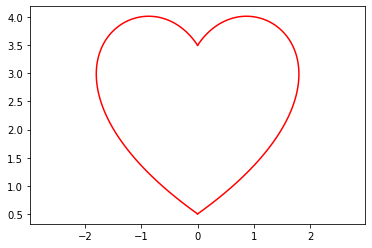

In [34]:
plt.axis('equal')

#On définit les points de contrôle.
a= np.array([[0,-3.5,-1,0],
             [0.5,3,5,3.5]])
b= np.array([[0,1,3.5,0],
             [3.5,5,3,0.5]])

#On définit les deux courbes cubiques.
courbeBeziera= algorithme_bezier(a,4,0.01)
courbeBezierb= algorithme_bezier(b,4,0.01)

#On les affiche.
plt.plot(courbeBeziera[0][:], courbeBeziera[1][:], color='red')
plt.plot(courbeBezierb[0][:], courbeBezierb[1][:], color='red')

plt.show()

On peut aussi réaliser le dessin avec les vecteurs :

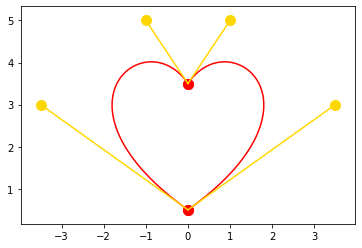

In [35]:
plt.axis('equal')

#On les affiche.
plt.plot(courbeBeziera[0][:], courbeBeziera[1][:], color='red')
plt.plot(courbeBezierb[0][:], courbeBezierb[1][:], color='red')

#On affiche les vecteurs.

#On affiche les tangentes.
plt.plot([a[0][0],a[0][1]], [a[1][0],a[1][1]], color='gold', label='tangente')
plt.plot([a[0][2],a[0][3]], [a[1][2],a[1][3]], color='gold')

plt.plot([b[0][0],b[0][1]], [b[1][0],b[1][1]], color='gold', label='tangente')
plt.plot([b[0][2],b[0][3]], [b[1][2],b[1][3]], color='gold')

#On affiche les points d'ancrage.
plt.scatter([a[0][0]], [a[1][0]], color='red', label='point d\'ancrage', s=100)
plt.scatter([a[0][3]], [a[1][3]], color='red', s=100)

plt.scatter([b[0][0]], [b[1][0]], color='red', label='point d\'ancrage', s=100)
plt.scatter([b[0][3]], [b[1][3]], color='red', s=100)

#On affiche les points directeurs.
plt.scatter([a[0][1]], [a[1][1]], color='gold', label='point directeur', s=100)
plt.scatter([a[0][2]], [a[1][2]], color='gold', s=100)

plt.scatter([b[0][1]], [b[1][1]], color='gold', label='point directeur', s=100)
plt.scatter([b[0][2]], [b[1][2]], color='gold', s=100)

plt.show()

### La lettre "e" :

Revenons à notre motivation de départ. Nous avons vu dans l'introduction qu'une application importante des courbes de Bézier concerne la typographie et notamment les polices de caractères. En effet, les polices Postscript sont calculées à partir des courbes de Bézier. L’intérêt est que les courbes sont recalculées lors de chaque agrandissement, ce qui  ́évite les phénomènes de “pixellisation”.

Nous avons construit la lettre "e" à l'aide des courbes de Bézier. Dans un premier temps, nous avons à l'aide d'une image de la lettre et de GeoGebra, définit l'ensemble des points "stratégiques" indispensable pour réaliser notre figure. Puis, après quelques minutes de tâtonnements, nous avons trouvé les bonnes longueurs des vecteurs pour arriver à un résultat correct.

Voici le résultat :

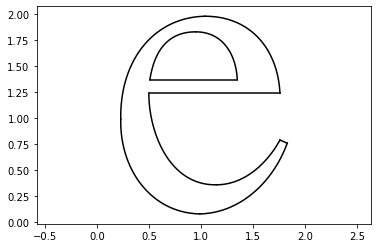

In [36]:
#On définit nos points de contrôle.
pointsControle= np.zeros((11,2,4))

pointsControle[0]= np.array([[1.76,1.74,1.48,1.04],[1.24,1.66,1.98,1.98]])
pointsControle[1]= np.array([[1.04,0.55,0.22,0.23],[1.98,1.97,1.56,0.99]])
pointsControle[2]= np.array([[0.23,0.22,0.52,0.99],[0.99,0.51,0.09,0.08]])
pointsControle[3]= np.array([[0.99,1.39,1.7,1.83],[0.08,0.09,0.4,0.76]])
pointsControle[4]= np.array([[1.83,1.76,1.76,1.76],[0.76,0.79,0.79,0.79]])
pointsControle[5]= np.array([[1.76,1.64,1.42,1.15],[0.79,0.57,0.36,0.36]])
pointsControle[6]= np.array([[1.15,0.7,0.5,0.5],[0.36,0.35,0.86,1.24]])
pointsControle[7]= np.array([[0.5,1.76,1.76,1.76],[1.24,1.24,1.24,1.24]])
pointsControle[8]= np.array([[0.51,0.55,0.67,0.95],[1.37,1.63,1.83,1.83]])
pointsControle[9]= np.array([[0.95,1.22,1.34,1.35],[1.83,1.83,1.6,1.37]])
pointsControle[10]=np.array([[1.35,0.51,0.51,0.51],[1.37,1.37,1.37,1.37]])

#On définit nos courbes de Bézier cubique.
courbes= np.zeros((11,2,101))

for i in range(11):
    courbes[i]= algorithme_bezier(pointsControle[i],4,0.01)
    

#On les affiche.
for i in range(11):
    plt.plot(courbes[i,0,:], courbes[i,1,:], color='black')

plt.axis('equal')
plt.show()

Ci-dessous, l'ensemble des vecteurs : 

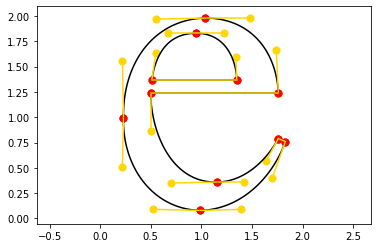

In [37]:
#On les affiche.
for i in range(11):
    plt.plot(courbes[i,0,:], courbes[i,1,:], color='black')
    
    #On affiche les tangentes.
    plt.plot([pointsControle[i,0,0],pointsControle[i,0,1]], [pointsControle[i,1,0],pointsControle[i,1,1]], color='gold', label='tangente')
    plt.plot([pointsControle[i,0,2],pointsControle[i,0,3]], [pointsControle[i,1,2],pointsControle[i,1,3]], color='gold')
    
    #On affiche les points directeurs.
    plt.scatter([pointsControle[i,0,1]], [pointsControle[i,1,1]], color='gold', label='point directeur', s=50)
    plt.scatter([pointsControle[i,0,2]], [pointsControle[i,1,2]], color='gold', s=50)
    
    #On affiche les points d'ancrage.
    plt.scatter([pointsControle[i,0,0]], [pointsControle[i,1,0]], color='red', label='point d\'ancrage', s=50)
    plt.scatter([pointsControle[i,0,3]], [pointsControle[i,1,3]], color='red', s=50)
    

plt.axis('equal')
plt.show()

Enfin, montrons la propriété qui nous intéresse depuis le début : on peut agrandir l'image autant de fois que l'on veut sans altérer sa qualité.

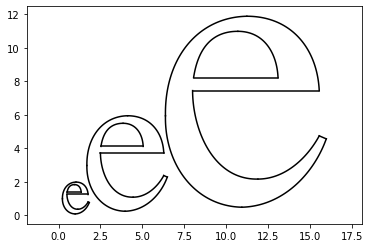

In [38]:
"""Grossissement de x3 et x6"""
#On définit 3 décalages et grossissements.
decalage= np.array([0,1,5])
grossissement= np.array([1,3,6])

for i in range (3):
    for j in range(11):
        plt.plot(grossissement[i]*courbes[j,0,:]+decalage[i], grossissement[i]*courbes[j,1,:], color='black')
    
plt.axis('equal')
plt.show()

# 4. Un cas particulier du théorème de Bernstein: 
## a/. Théorème :
$f$ une fonction continue sur un compact $K$ soit $[0,1]$ et le module de continuité uniforme de la fonction $f$ est l'application $ \omega (f,.) $ définie sur $\mathbb{R}^+ $ par : 

$$ \omega (f,\delta ) = sup_{(x,y) \in K^2} {| f(x) - f(y)| \ tel\ que\ |x-y| \leqslant \delta } \\ $$

Pour $ n \in \mathbb{N}^*$ on définit le $ n-ème $ polynome de $ Bernstein $ de f :
$$ B_n(f)(t)=\sum \limits_{\underset{}{k=0}}^n \binom{n}{k}t^k(1-t)^{n-k} f\left(\frac{k}{n}\right)$$
Alors $ B_n(f)(t)$ converge uniformement vers $f$ sur $[0,1]$ quand $n \to \infty $ et plus précisément $ \exists C \in \mathbb{R} , \forall n \in \mathbb{N}^* : \\ $
$$ ||f-B_n(f)||_\infty \leqslant C \omega \left(f,\frac{1}{\sqrt{n}}\right)$$
Avec $ C=\frac{9}{4}= C=\frac{3}{2}$

Soit $(T_n)_{n \in \mathbb{N}} $ une suite de variables indépendantes et identiquement distribuées (va.iid) suivant la loi de $ Bernoulli\ b(t)$ avec $ t \in [0,1] $

On pose $ S_n = \sum \limits_{\underset{}{k=1}}^n T_k ~ B(n,t) $

Par la $ Loi\ des\ Grands\ Nombres $ qui dit :

Soit $ (X_i)_{i\geqslant0}$ une suite de va.iid tel que $ \mathbb{E} (|X_1|)< \infty $ et $ \overline{X_n}= \frac{X_1+\ldots X_n}{n}$ la moyenne empirique des $n$ premiers termes de $ (X_i)_{i\geqslant0}$ alors on a $ \epsilon >  0 $ 
$$ \mathbb{P}(|\overline{X_n}-\mathbb{E}(|X_1|) > \epsilon ) \xrightarrow[n \to \infty]{} 0  $$ 
De façon équivalente, $ \overline{X_n}$ converge en probabilité vers $ \mathbb{E} (|X_1|)$, i.e  $ \overline{X_n}$ est proche de  $ \mathbb{E} (|X_1|)$ avec une forte probabilité.

On a $$  \mathbb{E}\left[f\left(\frac{S_n}{n}\right)\right]=\sum \limits_{\underset{}{k=0}}^n \binom{n}{k}t^k(1-t)^{n-k} f\left(\frac{k}{n}\right) = B_n(f)(t)  $$
Quand $ n \to \infty $ on a que $  \mathbb{E}\left[f\left(\frac{S_n}{n}\right)\right] \to \mathbb{E}[f(t)]=f(t) $

#### Utilisant le Lemme suivant qui représente une propriété du module de continuité uniforme $ \omega$ :
Soit $\delta \in [0,1], \lambda > 0 $ tel que $$ \lambda \delta \in [0,1] \Longrightarrow \omega ( \lambda \delta) \leqslant( \lambda +1) \omega (\delta) $$
En particulier, en prenant $ \delta=\frac{1}{\sqrt{n}}$ et $  \lambda= \sqrt{n}|t-\frac{S_n}{n}|$ on aura 
$$ \omega \left(\left |t-\frac{S_n}{n}\right| \right) = \omega \left( \frac{\sqrt{n}}{\sqrt{n}}\left|t-\frac{S_n}{n}\right|\right ) \leqslant \left(  \sqrt{n}\left|t-\frac{S_n}{n}\right|+1 \right)\omega \left(\frac{1}{\sqrt{n}}\right)$$

#### En utilisant l'inégalité de $ Hölder$ qui dit : 

Soient $ p,q>1$ des nombres réels tel que $ \frac{1}{p}+ \frac{1}{q}=1$ , pour tous $ (u_1,\ldots, u_n) \in \mathbb{R}^+$  et $(v_1,\ldots, v_n) \in \mathbb{R}^+ $ on a :
$$ \sum \limits_{\underset{}{k=1}}^n |u_k v_k| \leqslant \left(\sum \limits_{\underset{}{k=1}}^n |u_k|^p\right)^{\frac{1}{p}} \left(\sum \limits_{\underset{}{k=1}}^n |v_k|^p\right)^{\frac{1}{p}}$$
on aura $$ |f(t)- B_n(f)| \leqslant  \mathbb{E} \left[\left|f(t)-f\left(\frac{S_n}{n}\right)\right|\right] \\ $$
$$ \leqslant  \mathbb{E} \left[\omega \left(\left|t-\frac{S_n}{n}\right|\right)\right] \\ $$
$$ \leqslant  \mathbb{E} \left[\sqrt{n}\left|t-\frac{S_n}{n}\right|+1 \right] \omega \left(\frac{1}{\sqrt{n}}\right)  \\ $$
$$ \leqslant \left(\sqrt{n}\left|\left|t-\frac{S_n}{n}\right|\right|_1 +1\right)\omega \left(\frac{1}{\sqrt{n}}\right) \\ $$
$$\leqslant \left(\sqrt{n}\left|\left|t-\frac{S_n}{n}\right|\right|_2 +1\right)\omega \left(\frac{1}{\sqrt{n}}\right) $$
Or $$ {\left|\left|t-\frac{S_n}{n}\right|\right|_2}^2 = \mathbb{E} \left[\left(t-\frac{S_n}{n}\right)^2\right] $$

#### D'apres la propriété de la variance : $$ Var(X) = \mathbb{E} (X^2) - [\mathbb{E} (X)]^2 \Longrightarrow \mathbb{E} (X^2) = Var(X) + [\mathbb{E} (X)]^2 $$
On obtient : $$ {\left|\left|t-\frac{S_n}{n}\right|\right|_2}^2 = \mathbb{E} \left[\left(t-\frac{S_n}{n}\right)^2\right] \\ = Var\left(t-\frac{S_n}{n}\right) + \left[ \mathbb{E} \left(t-\frac{S_n}{n}\right)\right]^2 \\ = \frac{Var(S_n)}{n^2} = \frac{nt(1-t)}{n^2}=\frac{t(1-t)}{n} $$
Donc on obtient : $$ |f(t)-B_n(f)| \leqslant  ( \sqrt{t(1-t)}+1)\omega \left(\frac{1}{\sqrt{n}}\right) \leqslant \frac{3}{2} \omega \left(\frac{1}{\sqrt{n}}\right) $$

# 5. Conclusion: 
Les courbes de Bézier est l'un des outils les plus utilisés dans les logiciels de dessin vectoriel tels : $ JPicEdt$, $Inkscape$ et $ Gimp $ ainsi que dans les logiciels du rendu 3D comme $ Blender$. <br>
Plus particulièrement, les courbes de bézier quadratiques servent à  définir l'avancement d'une annimation ou transition $ CSS3 $ qui représente un langage qui décrit une page web et les courbes cubiques sont utilisées pour les polices de caractères $ TrueType $. <br>
Enfin, grâce à l'utilisation de cette technique on a réuissit à obtenir des textes et des images de meilleure qualité contrairement aux années 80. <br>